# Aquí empieza la replica del articulo orignial.

## Bibliotecas

In [2]:
import pandas as pd
import sklearn
import sys
from os import listdir
import matplotlib as mpl
import os
from matplotlib import image
from matplotlib import pyplot as plt
import h5py
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import tensorflow as tf
from tensorflow import keras as K
import pennylane as qml
from timeit import default_timer as timer
from datetime import timedelta
import seaborn as sns
from datetime import datetime, timedelta
import random
from tqdm.notebook import trange

In [12]:
arch = "../DataSet/Tumores/1.mat"
data = h5py.File(arch, 'r')
label = data['cjdata']['label'][0][0]
pid = data['cjdata']['PID'][0]
imagen = data['cjdata']['image']
borde_tumor = data['cjdata']['tumorBorder'][0]
mascara_tumor = data['cjdata']['tumorMask']

print("Label:", label)
print("PID:", pid)
print("Forma de imagen:", imagen.shape)
print("Borde del tumor:", borde_tumor)
print("Mascara del tumor:", mascara_tumor.shape)

Label: 1.0
PID: [49]
Forma de imagen: (512, 512)
Borde del tumor: [267.61524501 231.37568058 277.83666062 248.10163339 289.91651543
 250.8892922  305.71324864 253.676951   318.72232305 249.9600726
 321.50998185 237.88021779 354.96188748 234.16333938 367.97096189
 227.65880218 380.9800363  210.93284936 372.61705989 195.13611615
 363.32486388 177.48094374 350.31578947 176.55172414 336.37749546
 183.98548094 317.79310345 196.06533575 305.71324864 207.21597096
 295.49183303 217.43738657 288.98729583 222.08348457 273.19056261
 223.94192377 268.54446461 228.58802178]
Mascara del tumor: (512, 512)


## Informacion del Dataset
En esta parte hacemos una exploración estadística del Dataset

Numero de etiquetas por tipo de tumor:
Meningioma              708
Glioma                 1426
Adenoma hipofisario     930
Name: count, dtype: int64


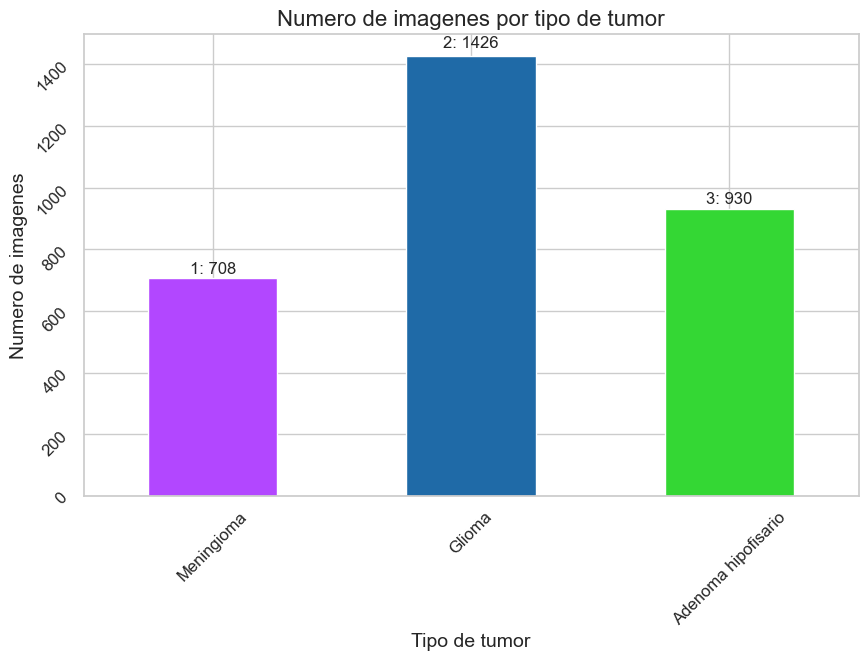

In [19]:
# Cargando las etiquetas de los archivos
folder = "../DataSet/Tumores/"
lista = sorted(os.listdir(folder))
etiquetas = [np.array(h5py.File(f"{folder}{archivo}", 'r').get("cjdata/label")[0][0]) for archivo in lista ]
etiquetas = pd.Series(etiquetas)

# Contando el número de etiquetas por tipo de tumor
# El dataset contiene 3 tipos de tumores, cuyas etiquetas son 1 para Meningioma, 2 para Glioma, 3 para Adenoma hipofisario.
tumores = ["Meningioma", "Glioma", "Adenoma hipofisario"]
# Ordenamos el vector de los nombres y las etiquetas para que coincidan con el orden de los tumores en el dataset
numEtiquetas = etiquetas.value_counts().sort_index()
numEtiquetas.index = tumores

print("Numero de etiquetas por tipo de tumor:")
print(numEtiquetas)

sns.set_theme(style="whitegrid")

ax = numEtiquetas.plot(kind='bar', figsize=(10, 6), color=["#B247FF", "#1F6AA7", "#34D734"])

ax.set_title("Numero de imagenes por tipo de tumor", fontsize=16)
ax.set_xlabel("Tipo de tumor", fontsize=14)
ax.set_ylabel("Numero de imagenes", fontsize=14)

ax.tick_params(labelsize=12, rotation=45)

for i, p in enumerate(ax.patches):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f"{i+1}: {height}", (x + width/2, y + height*1.02), ha='center', fontsize=12)

plt.show()
